<a href="https://colab.research.google.com/github/cahyogadhang/cahyogadhang-2025-KECERDASAN-BUATAN-TI-1B/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UJIAN TENGAH SEMESTER KECERDASAN BUATAN


Nama:    Cahyo Gadhang Putro Baskoro

NIM:     4.33.24.1.05

Kelas:   TI-1B

Tanggal: 23 Mei 2025

# Analisis Data Airbnb NYC 2019


## Import Library dan Load DataSet

In [2]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
df = pd.read_csv('airbnb.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Eksplorasi Data Awal

1. Lihat struktur data (jumlah kolom, tipe, non-null)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

2. Statistik deskriptif untuk kolom numerik

In [4]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


3. Cek jumlah missing values per kolom

In [5]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


4. Cek tipe data tiap kolom

In [6]:
df.dtypes

,0
id,int64
name,object
host_id,int64
host_name,object
neighbourhood_group,object
neighbourhood,object
latitude,float64
longitude,float64
room_type,object
price,int64


5. Statistik khusus untuk kolom 'price'

In [7]:
df['price'].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


## Data Cleaning

In [9]:
df = df[df['price'] > 0]
df = df[df['price'] <= 1000]
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df[df['price'].notna() & df['minimum_nights'].notna()]
df.dropna(how='any', inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


## Data Manipulation

Kategori Harga

In [10]:
def categorize_price(p):
    if p < 100:
        return 'Murah'
    elif p < 300:
        return 'Sedang'
    else:
        return 'Mahal'

df['kategori_harga'] = df['price'].apply(categorize_price)

# Lihat hasil kategori
df[['price', 'kategori_harga']].head()

,price,kategori_harga
0,149,Sedang
1,225,Sedang
3,89,Murah
4,80,Murah
5,200,Sedang


Kategori Ketersediaan

In [11]:
def kategori_ketersediaan(a):
    if a == 0:
        return 'Tidak tersedia'
    elif a < 100:
        return 'Rendah'
    elif a < 300:
        return 'Sedang'
    else:
        return 'Tinggi'

df['kategori_ketersediaan'] = df['availability_365'].apply(kategori_ketersediaan)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kategori_harga,kategori_ketersediaan
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Sedang,Tinggi
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Sedang,Tinggi
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Murah,Sedang
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Murah,Tidak tersedia
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,Sedang,Sedang


## Analisis Deskriptif

Mengurutkan Harga Tertinggi

In [15]:
df1 = df.sort_values(by='price', ascending=False)
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kategori_harga,kategori_ketersediaan
15833,12811459,Superhost-Designer Legal 4 Bed Townhouse Midto...,69852641,Lisa,Manhattan,Hell's Kitchen,40.76303,-73.98767,Entire home/apt,1000,2,24,2019-05-30,0.71,3,274,Mahal,Sedang
15837,12812577,Superhost-Pristine 4 Bed Legal Townhouse Midto...,69852641,Lisa,Manhattan,Hell's Kitchen,40.76300,-73.98642,Entire home/apt,1000,2,23,2019-06-09,0.70,3,240,Mahal,Sedang
15890,12851307,Private Room in Williamsburg Duplex,70208173,Mark,Brooklyn,Williamsburg,40.71267,-73.95367,Private room,1000,35,6,2016-06-02,0.16,1,365,Mahal,Tinggi
21176,16807028,Sunny Ditmas Park Carriage House (Events Listing),8111912,Jed,Brooklyn,Flatbush,40.64335,-73.96745,Entire home/apt,1000,1,1,2019-04-02,0.31,2,365,Mahal,Tinggi
23694,19157123,NYC Hotel (Enjoy top tier membership benefits),7050126,Sasha,Manhattan,Midtown,40.76347,-73.97800,Entire home/apt,1000,1,3,2017-07-29,0.12,2,90,Mahal,Rendah


Mengurutkan Harga Terendah

In [16]:
df1 = df.sort_values(by='price', ascending=True)
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,kategori_harga,kategori_ketersediaan
31066,24114389,"Very Spacious bedroom, steps from CENTRAL PARK.",180661875,Salim,Manhattan,Upper West Side,40.76844,-73.98333,Private room,10,1,2,2018-04-23,0.13,1,0,Murah,Tidak tersedia
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,40.69085,-73.79916,Entire home/apt,10,1,43,2019-06-12,1.68,1,252,Murah,Sedang
22287,17979764,Jen Apt,84497333,Jennifer,Manhattan,SoHo,40.72237,-73.99817,Private room,10,5,2,2017-04-15,0.07,1,0,Murah,Tidak tersedia
33225,26235873,Voted #1 Airbnb In NYC,197169969,Maria,Queens,Jamaica,40.68939,-73.79886,Entire home/apt,10,2,22,2019-07-06,1.76,1,332,Murah,Tinggi
35601,28270998,"Charming, bright and brand new Bed-Stuy home",647528,Caterina,Brooklyn,Bedford-Stuyvesant,40.69508,-73.95164,Entire home/apt,10,3,5,2019-07-02,0.51,1,0,Murah,Tidak tersedia


Kumpulan Data

In [17]:
# Statistik umum
print("Statistik Umum:\n", df.describe())

# Distribusi room_type
print("\nDistribusi Tipe Ruangan:\n", df['room_type'].value_counts())

# Rata-rata harga per room_type
print("\nRata-rata Harga / Room Type:\n", df.groupby('room_type')['price'].mean())

# Rata-rata harga per wilayah
print("\nRata-rata Harga / Wilayah:\n", df.groupby('neighbourhood_group')['price'].mean())

# Jumlah listing per wilayah
print("\nJumlah Listing per Wilayah:\n", df['neighbourhood_group'].value_counts())

# Host terbanyak
print("\nTop 5 Host dengan Listing Terbanyak:\n", df['host_id'].value_counts().head(5))

# Listing dengan review terbanyak
print("\nListing dengan Review Terbanyak:\n", df.sort_values('number_of_reviews', ascending=False)[['name', 'number_of_reviews']].head(5))

# Korelasi antar variabel
print("\nKorelasi:\n", df[['price', 'number_of_reviews', 'availability_365']].corr())

Statistik Umum:
                  id       host_id      latitude     longitude         price  \
count  3.870400e+04  3.870400e+04  38704.000000  38704.000000  38704.000000   
mean   1.810429e+07  6.427137e+07     40.728117    -73.951088    135.906883   
std    1.069508e+07  7.592331e+07      0.055024      0.046712    108.660647   
min    2.539000e+03  2.438000e+03     40.506410    -74.244420     10.000000   
25%    8.729807e+06  7.041178e+06     40.688630    -73.982422     69.000000   
50%    1.887416e+07  2.840995e+07     40.721650    -73.954760    100.000000   
75%    2.757262e+07  1.019719e+08     40.763000    -73.934978    169.000000   
max    3.645581e+07  2.738417e+08     40.913060    -73.712990   1000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    38704.000000       38704.000000       38704.000000   
mean         5.846450          29.329475           1.374924   
std         17.289923          48.232049           1.681514   
min          1.0000

## Visualisasi Data

Visualisasi Distribusi Harga

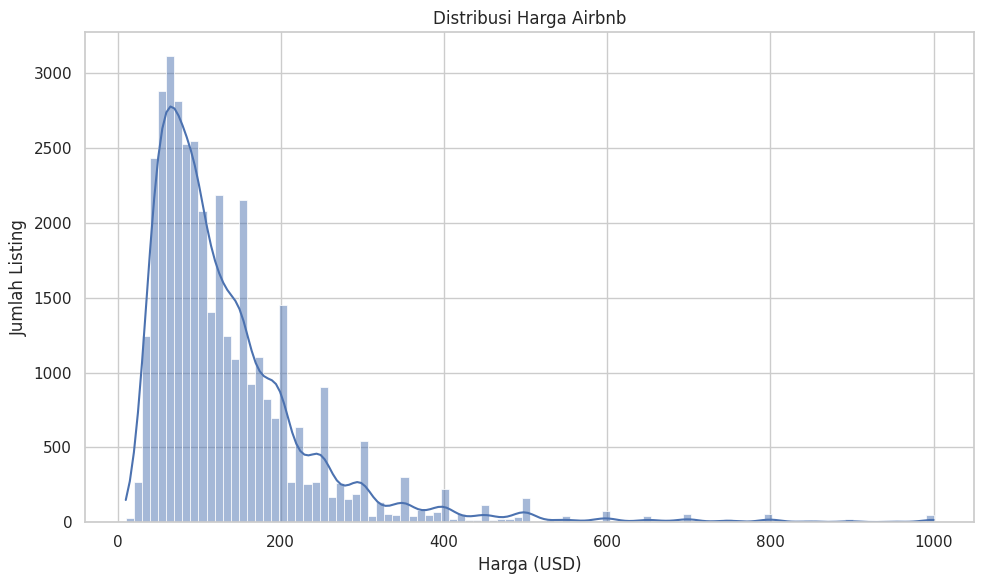

In [18]:
# Visualisasi Distribusi Harga
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=100, kde=True)
plt.title("Distribusi Harga Airbnb")
plt.xlabel("Harga (USD)")
plt.ylabel("Jumlah Listing")
plt.tight_layout()
plt.show()

Jumlah Properti per Wilayah

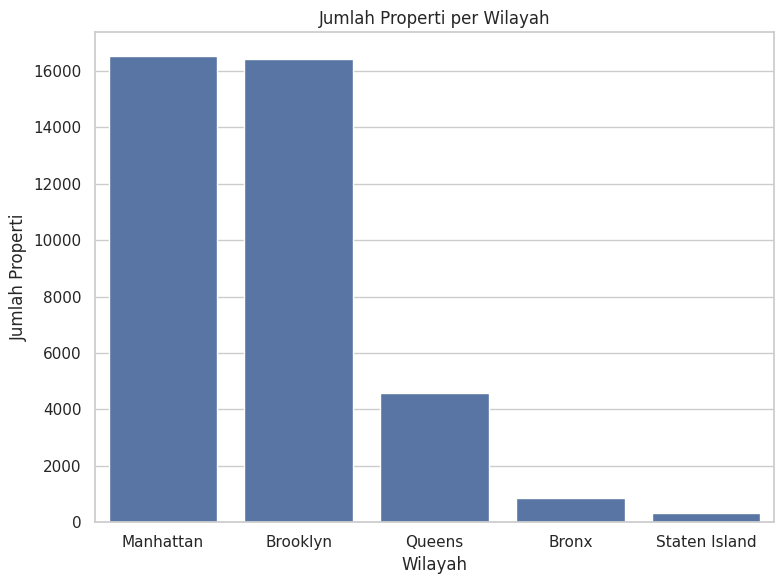

In [27]:
# Jumlah Properti per Wilayah
plt.figure(figsize=(8,6))
sns.countplot(x='neighbourhood_group', data=df, order=df['neighbourhood_group'].value_counts().index)
plt.title("Jumlah Properti per Wilayah")
plt.xlabel("Wilayah")
plt.ylabel("Jumlah Properti")
plt.tight_layout()
plt.show()

Harga Rata-rata per Wilayah

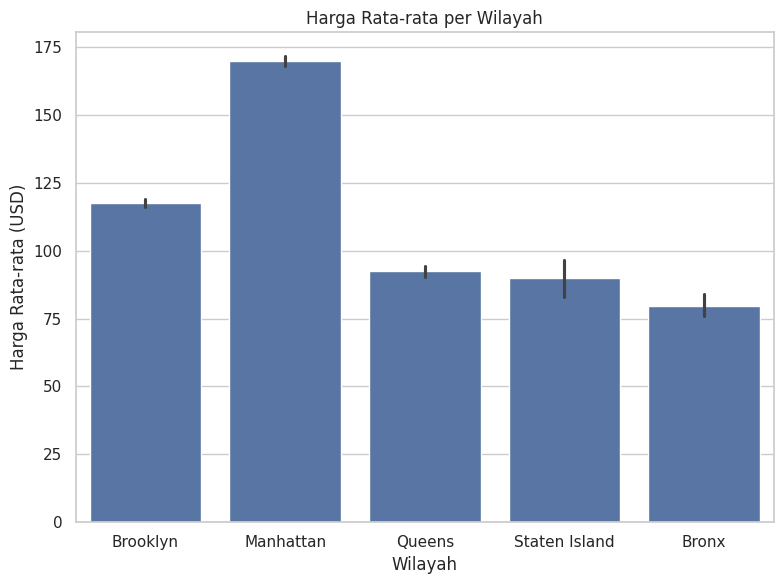

In [26]:
# Harga Rata-rata per Wilayah
plt.figure(figsize=(8,6))
sns.barplot(x='neighbourhood_group', y='price', data=df)
plt.title("Harga Rata-rata per Wilayah")
plt.xlabel("Wilayah")
plt.ylabel("Harga Rata-rata (USD)")
plt.tight_layout()
plt.show()

Ketersediaan vs Harga

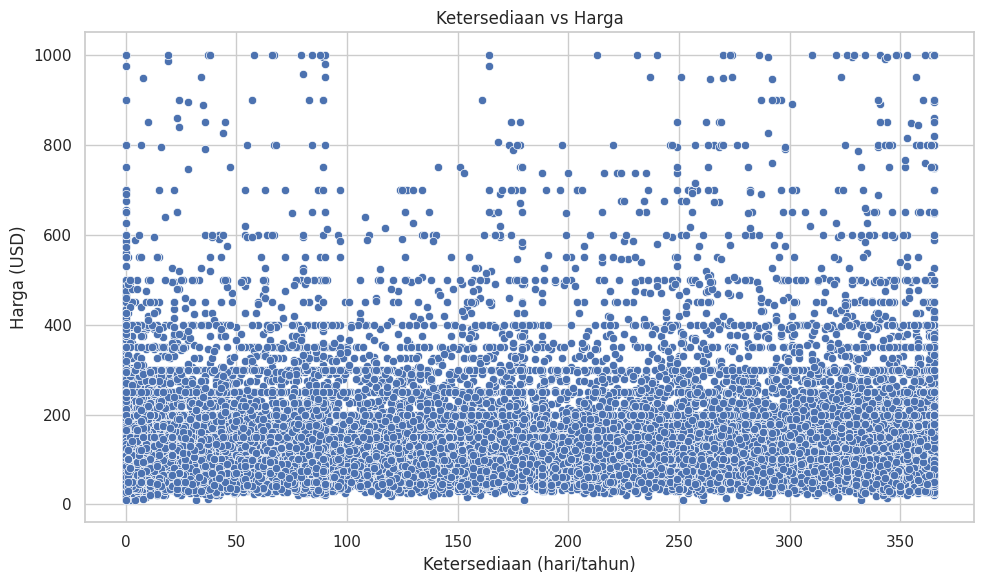

In [25]:
# Ketersediaan vs Harga
plt.figure(figsize=(10,6))
sns.scatterplot(x='availability_365', y='price', data=df)
plt.title("Ketersediaan vs Harga")
plt.xlabel("Ketersediaan (hari/tahun)")
plt.ylabel("Harga (USD)")
plt.tight_layout()
plt.show()

Pie Chart Kategori Harga

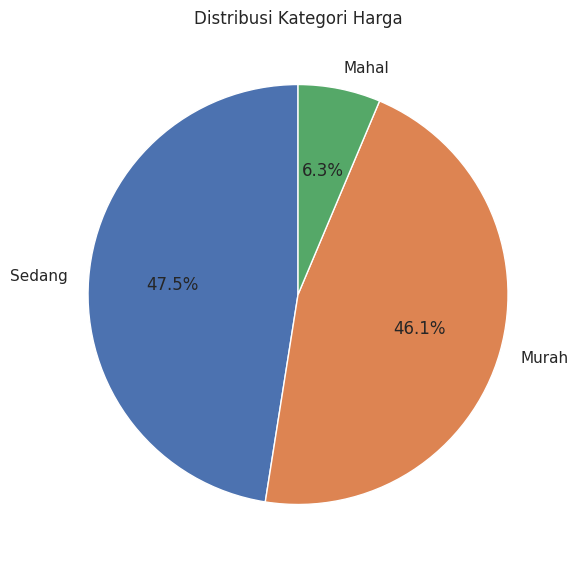

In [24]:
# Pie Chart Kategori Harga
plt.figure(figsize=(6,6))
df['kategori_harga'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Distribusi Kategori Harga")
plt.ylabel("")
plt.tight_layout()
plt.show()

## Kesimpulan
- Sebagian besar listing berada di Brooklyn.
- Harga paling umum berkisar antara $50–$200.
- Manhattan memiliki rata-rata harga tertinggi.
- Mayoritas listing tidak tersedia sepanjang tahun.
- Mayoritas listing termasuk kategori harga 'Murah' dan 'Sedang'.